- `instant`: record index
- `dteday` : date
- `season` : season (1:springer, 2:summer, 3:fall, 4:winter)
- `yr` : year (0: 2011, 1:2012)
- `mnth` : month ( 1 to 12)
- `hr` : hour (0 to 23)
- `holiday` : weather day is holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
- `weekday` : day of the week
- `workingday` : if day is neither weekend nor holiday is 1, otherwise is 0.
+ `weathersit` : 
	- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
	- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
	- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
	- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- `temp` : Normalized temperature in Celsius. The values are divided to 41 (max)
- `atemp`: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
- `hum`: Normalized humidity. The values are divided to 100 (max)
- `windspeed`: Normalized wind speed. The values are divided to 67 (max)
- `casual`: count of casual users
- `registered`: count of registered users
- `cnt`: count of total rental bikes including both casual and registered

## PART I: Exploratory Data Analysis

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objs as go
import plotly.figure_factory as ff
plt.style.use('fivethirtyeight')
import datetime
from dateutil import relativedelta

In [2]:
data = pd.read_csv("bike-sharing_hourly.csv", index_col=False)
data.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [4]:
data.shape

(17379, 17)

In [5]:
# Creating Day variable and makind the time stamp index of the data
data['dteday'] = data['dteday'].astype('datetime64[ns]')
data["day"] = data.dteday.dt.day
data = data.set_index('dteday')
data = data.drop('instant', axis=1)
data.head()


,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,day
dteday,,,,,,,,,,,,,,,,
2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16,1
2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40,1
2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32,1
2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13,1
2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1,1


In [6]:
categorical_variables = ["season", "holiday", "workingday", "weathersit", "yr", "mnth", "day","hr",'weekday']
continuous_variables = ["temp", "atemp", "hum", "windspeed", "casual", "registered", "cnt"]

In [7]:
data.season.value_counts()

3    4496
2    4409
1    4242
4    4232
Name: season, dtype: int64

In [8]:
fig = px.line(data, x=data.index, y="cnt", color='yr')
fig.show()

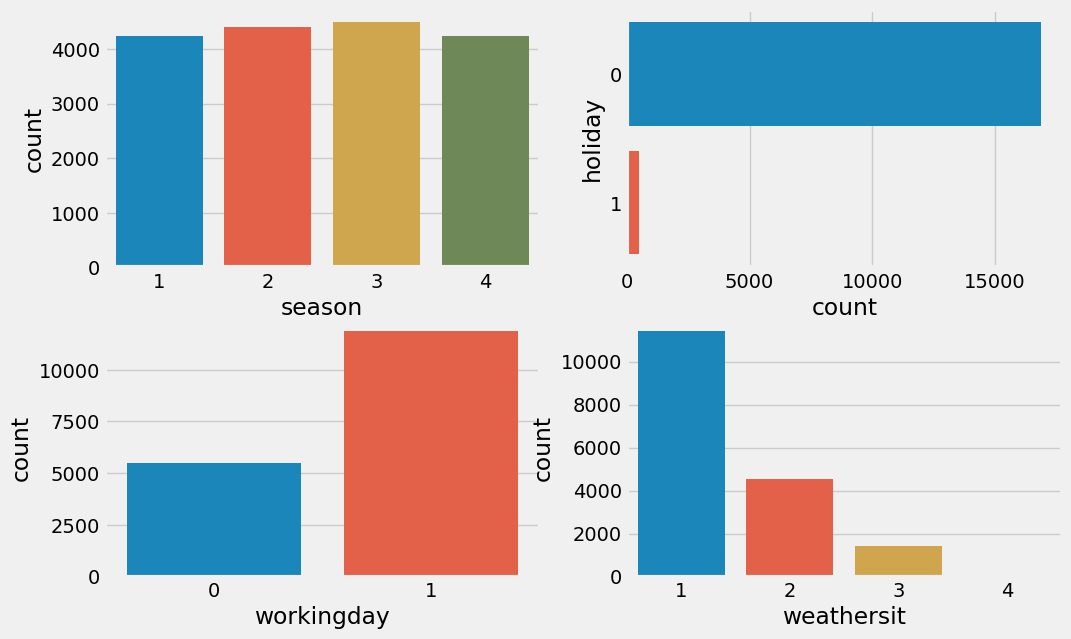

In [9]:
plt.figure(figsize=(11,7))


plt.subplot(2, 2, 1)
sns.countplot(x = 'season', data = data)

plt.subplot(2, 2, 2)
sns.countplot(y = 'holiday', data = data)

plt.subplot(2, 2, 3)
sns.countplot(x = 'workingday', data = data)

plt.subplot(2, 2, 4)
sns.countplot(x = 'weathersit', data = data)

plt.show()

In [10]:
data.describe()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,day
count,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088,15.683411
std,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599,8.789373
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000,8.000000
50%,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000,16.000000
75%,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000,23.000000
max,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000,31.000000


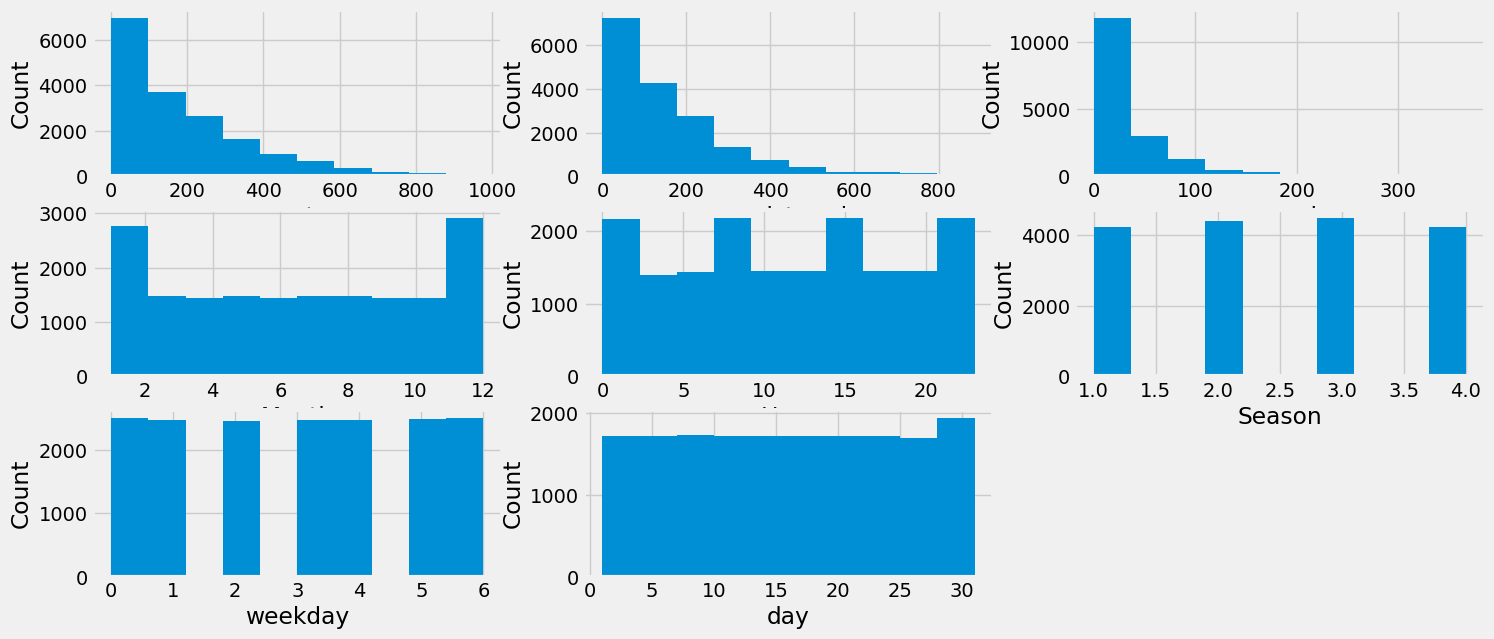

In [11]:
# plot histogram to check distribution

plt.figure(figsize=(16,7))


plt.subplot(3, 3, 1)
fig = data.cnt.hist(bins=10)
fig.set_xlabel('cnt')
fig.set_ylabel('Count')


plt.subplot(3, 3, 2)
fig = data.registered.hist(bins=10)
fig.set_xlabel('registered')
fig.set_ylabel('Count')


plt.subplot(3, 3, 3)
fig = data.casual.hist(bins=10)
fig.set_xlabel('casual')
fig.set_ylabel('Count')

plt.subplot(3, 3, 4)
fig = data.mnth.hist(bins=10)
fig.set_xlabel('Month')
fig.set_ylabel('Count')

plt.subplot(3, 3, 5)
fig = data.hr.hist()
fig.set_xlabel('Hour')
fig.set_ylabel('Count')

plt.subplot(3, 3, 6)
fig = data.season.hist()
fig.set_xlabel('Season')
fig.set_ylabel('Count')

plt.subplot(3, 3, 7)
fig = data.weekday.hist()
fig.set_xlabel('weekday')
fig.set_ylabel('Count')

plt.subplot(3, 3, 8)
fig = data.day.hist()
fig.set_xlabel('day')
fig.set_ylabel('Count')

plt.show()

##### The above histogram show that all of the features above are not normally distributed and the cnt,registered, and casual features have similar distribution and are right skeewed.There is also high peak in the number of bike counts in January and December. We can also see demad peak in the last days of months.Due to the direct relationship between cnt, registered, and casual columns, we can manage outlier values of registered and casual with the cnt column
##### Checking Outliers

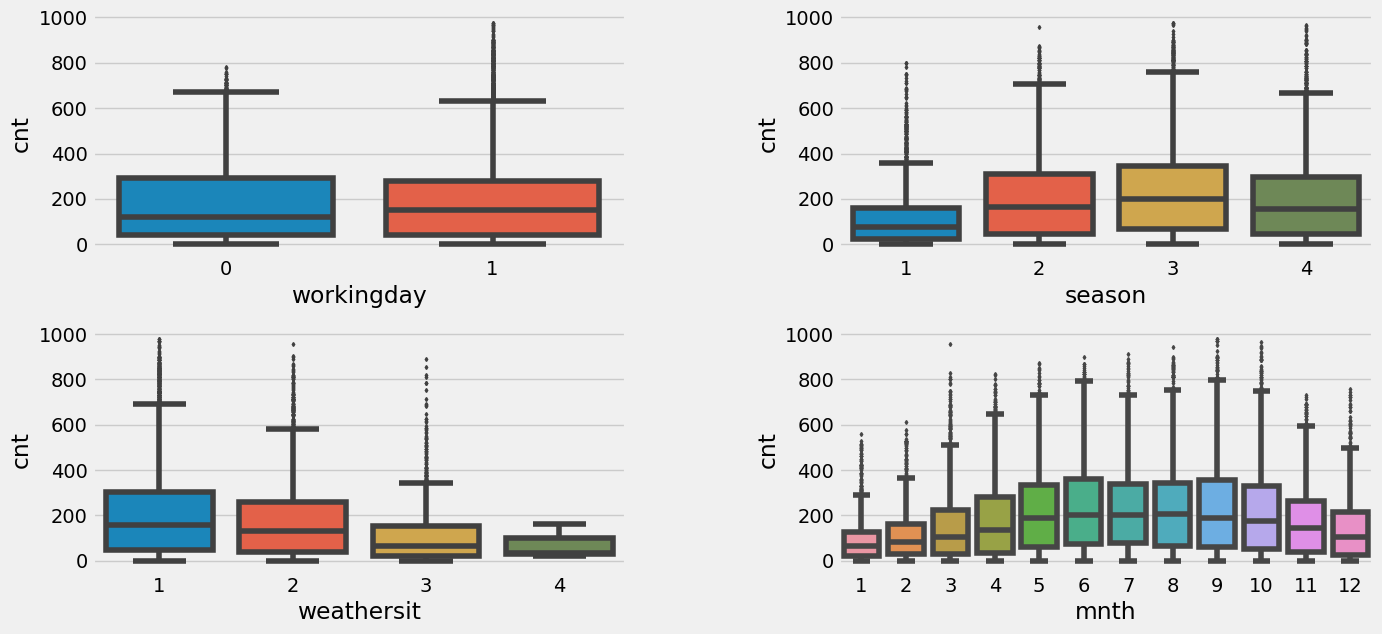

In [12]:
plt.figure(figsize=(16,7))


plt.subplot(2, 2, 1)
sns.boxplot(data=data, y="cnt", x="workingday", fliersize=2)

plt.subplot(2, 2, 2)
sns.boxplot(data=data, y="cnt", x="season",  fliersize=2)

plt.subplot(2, 2, 3)
sns.boxplot(data=data, y="cnt", x="weathersit",  fliersize=2)

plt.subplot(2, 2, 4)
sns.boxplot(data=data, y="cnt", x="mnth", fliersize=2)
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.3)

plt.show()

###### As we can see in the above box plot, the median value for the bike demand lies between 0 to 200. There is high outlier records in working days as compared to non working days.
###### In the season column, the lower fence for season one is much near to the median valie and the total demand in season 1 is also lower than the other seasons, while high outliers can be noticed in this season. Season 3 have a higher median for demand.
###### In the weathersit column, the third value has higher outlier. In the mnth column, the distribution of the demand have some pattern in the median value and there are more outliers in the 3rd month


In [13]:
# Checking for outlier values in the cnt column
fig = px.box(data, y="cnt", height=450, width=550)
fig.update_traces(quartilemethod="inclusive")
fig.show()

In [14]:
#checking the number of cnt entries having values above the upper fence/outliers/
IQR = data.cnt.quantile(0.75) - data.cnt.quantile(0.25)
Upper_fence = data.cnt.quantile(0.75) + (IQR * 1.5)
entries = data[data["cnt"]>Upper_fence]["cnt"]
print("percentage of outliers from the total data is" , round((len(entries)/len(data))*100, ndigits=2 ), "%")

percentage of outliers from the total data is 2.91 %


In [15]:
outliers = data[data["cnt"]>Upper_fence]

In [16]:
outliers.groupby(['mnth','yr','hr','holiday']).sum()

season  weekday  workingday  weathersit  temp   atemp  \
mnth yr hr holiday                                                          
3    1  8  0            11       20           6           8  2.72  2.6968   
        12 0             1        6           0           1  0.56  0.5303   
        13 0             1        6           0           1  0.60  0.6061   
        14 0             1        6           0           1  0.62  0.6212   
        15 0             1        6           0           1  0.64  0.6212   
...                    ...      ...         ...         ...   ...     ...   
11   1  17 0             8        9           2           4  0.82  0.8333   
        18 0             4        4           1           2  0.40  0.4091   
12   1  8  0            36       24           9          13  2.92  2.9091   
        17 0             8        3           2           2  1.04  1.0000   
        18 0             8        3           2           2  1.00  0.9696   

                     hum  windspeed  casual  registered   cnt  day  
mnth yr hr holiday                                                  
3    1  8  0        4.25     1.2239     209        3733  3942  142  
        12 0        0.68     0.1642     286         365   651   17  
        13 0        0.60     0.1045     286         400   686   17  
        14 0        0.53     0.0896     352         338   690   17  
        15 0        0.53     0.1343     357         322   679   17  
...                  ...        ...     ...         ...   ...  ...  
11   1  17 0        0.94     0.3582      98        1245  1343   10  
        18 0        0.50     0.1642      50         628   678    1  
12   1  8  0        6.57     1.5075     156        6145  6301   91  
        17 0        1.22     0.3284      86        1365  1451    7  
        18 0        1.31     0.3135      64        1359  1423    7  

[74 rows x 12 columns]

###### From the above table, we can see that the outliers are not only from certain month or hour and its percentage share from the total data is very low. So, we can remove it 

In [17]:
# Removing rows with outlier values
index = data[(data['cnt'] >= Upper_fence)].index
data.drop(index, inplace=True)
data.cnt.describe()

count    12582.000000
mean       154.830075
std        144.151444
min          1.000000
25%         34.000000
50%        116.000000
75%        227.000000
max        640.000000
Name: cnt, dtype: float64

In [18]:
peakhour = data.groupby(["hr","workingday"]).mean().reset_index(drop=False)

In [19]:
# Demand in each hour of the day over the two years
fig = px.line(peakhour, x='hr', y="cnt", color='workingday', markers=True, symbol="workingday", width= 1300)
fig.show()

##### The above graph shows that there is some kind of seasonality in different hours of a day in the demand of Bikes

In [20]:
# Demand in days of months over the two years

daydata = data.groupby(["day","workingday"]).mean().reset_index(drop=False)
fig = px.line(daydata, x='day', y="cnt", color='workingday', markers=True, symbol="workingday", width= 1300)
fig.show()

##### The graph above indicates that daily demand of Bikes also have some sinusoidal flow showing that the demand has some peaks and lows in different days of a month

In [21]:
weekdata = data.groupby(["weekday","workingday"]).mean().reset_index(drop=False)
fig = px.bar(weekdata, x='weekday', y="cnt", width=700)
fig.show()

##### As we can see from the above chart, the demand in weekday 3 high the highest and the lowest is on weekday 0 and 6

In [22]:
# I want a copy of the cleaned data to make Future prediction with cross validation later in modeling
dataForCv = data

#### Multivariate Analysis 

In [23]:
correlation = data[['season','mnth','hr','holiday', 'weekday','day','workingday','weathersit','temp','atemp','hum','windspeed','casual','registered','cnt']].corr()
xx = list(correlation.columns)
yy = list(correlation.index)
zz = np.array(correlation)

fig = ff.create_annotated_heatmap(
    zz,
    x = xx,
    y = yy ,
    annotation_text = np.around(zz, decimals=2),
    hoverinfo='z',
    colorscale='RdBu'
)

fig.update_layout(
    height=700,
    width = 900
)

##### The correlogram above shows that the cnt feature is more related to features: registered, casual, atemp, temp,hr, hum, and season.temp and atemp are also highly correlated to eachother, so we can omit one of them. Since the cnt variable is derived by a direct sum of casual and registered users count,they will give us 100% accracy in prediction, hence we will set asside the two features from the train set. 

C:\Users\remha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



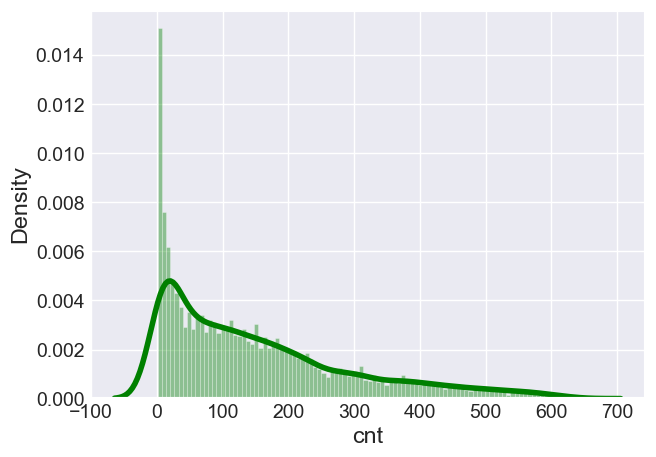

In [24]:
sns.set_style('darkgrid')
sns.distplot(data['cnt'], bins = 100, color = 'green')
plt.show()

#### Our target variable is highly skeweed, so we need to apply some transformation to remove the skewness using either log, square-root or box-cox transformation. After trying out all three, log square gives the best result. 

C:\Users\remha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



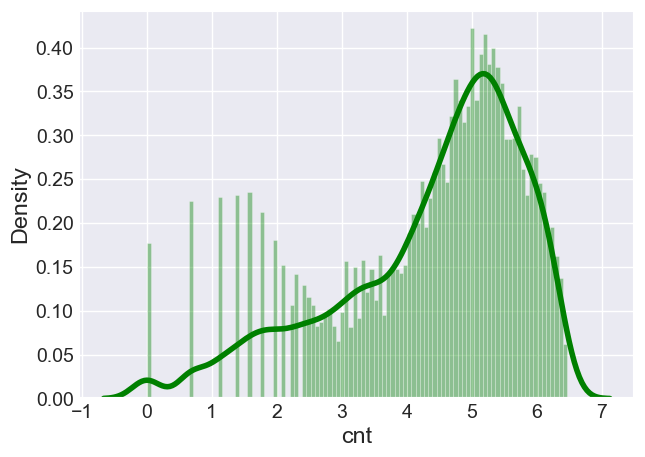

In [25]:
data.cnt = np.log(data['cnt'])

sns.set_style('darkgrid')
sns.distplot(data['cnt'], bins = 100, color = 'green')
plt.show()

#### Handling Cyclical Features, like Day, Month, and hr 

In [26]:
data['hr_sin'] = np.sin(data.hr*(2.*np.pi/24))
data['hr_cos'] = np.cos(data.hr*(2.*np.pi/24))
data['mnth_sin'] = np.sin((data.mnth-1)*(2.*np.pi/12))
data['mnth_cos'] = np.cos((data.mnth-1)*(2.*np.pi/12))
data['weekday_sin'] = np.sin((data.weekday+1)*(2.*np.pi/7))
data['weekday_cos'] = np.cos((data.weekday+1)*(2.*np.pi/7))
data['day_sin'] = np.sin((data.day)*(2.*np.pi/30))
data['day_cos'] = np.cos((data.day)*(2.*np.pi/30))

In [27]:
# converting categorical values into dummy values
data = pd.get_dummies(data=data, columns=['season', 'holiday', 'workingday', 'weathersit'])

## PART II: Prediction Model

In [28]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

##### We want to make hourly predictions and our data set is of two years data. So, to have the clear image of the futre, we prefer to make our training in the near periods of the dataset. So, we choose Oct-2012 as a test and train data split boundary, so that we go back for the past two months to predict the comming hour demand

In [29]:
featur = ['temp','hum','windspeed','hr_sin',
       'hr_cos', 'day_sin','day_cos','mnth_sin', 'mnth_cos', 'weekday_sin', 'weekday_cos',
       'season_1', 'season_2', 'season_3', 'season_4', 'holiday_0',
       'holiday_1', 'workingday_0', 'workingday_1', 'weathersit_1',
       'weathersit_2', 'weathersit_3', 'weathersit_4']

X_train = data.loc[data.index <= '2012-11-1']
X_test = data.loc[data.index > '2012-11-1']

y_train = X_train["cnt"]
y_test = X_test["cnt"]
X_train = X_train[featur]
X_test = X_test[featur]

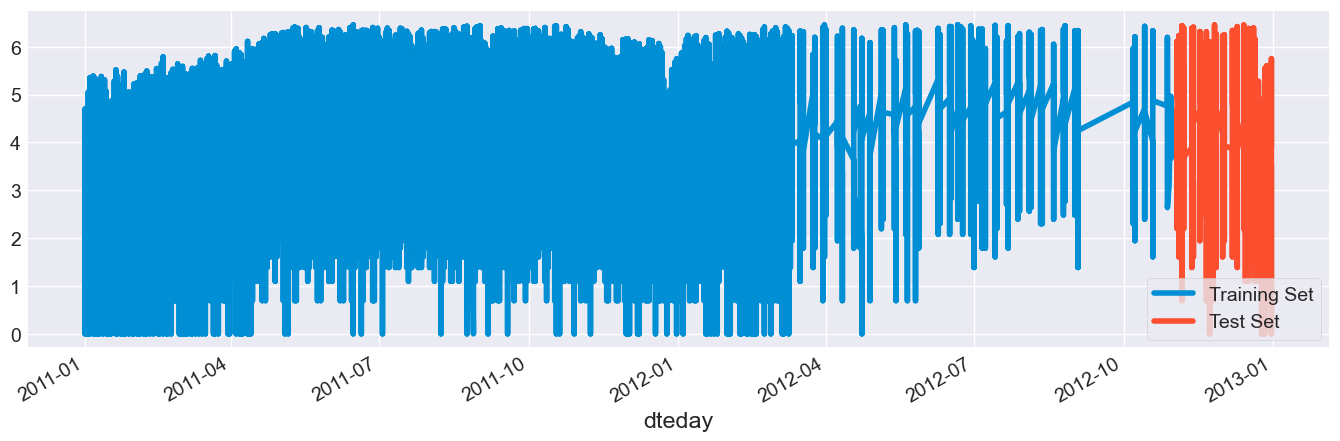

In [30]:
X_train_plt = X_train
X_test_plt = X_test

fig, ax = plt.subplots(figsize = (15,5))
y_train.plot(ax=ax, label="Training Set")
y_test.plot(ax=ax, label="Test Set")
ax.legend(['Training Set','Test Set'])
plt.show()

##### Hyper parameter tuning with grid search

In [31]:
booster=['gbtree','gblinear']
base_score=[0.25,0.5,0.75,1]

## Hyper Parameter Optimization
n_estimators = [100, 500, 900, 1100, 1500]
max_depth = [2, 3, 5, 10, 15]
booster=['gbtree']
learning_rate=[0.05,0.1,0.15,0.20]
min_child_weight=[1,2,3,4]

# Define the grid of hyperparameters to search
hyperparameter_grid = {
    'n_estimators': n_estimators,
    'max_depth':max_depth,
    'learning_rate':learning_rate,
    'min_child_weight':min_child_weight,
    'booster':booster,
    'base_score':base_score
    }
regr = XGBRegressor()
# Set up the random search with 4-fold cross validation
random_cv = RandomizedSearchCV(regr,
            param_distributions=hyperparameter_grid,
            cv=5, n_iter=50,
            scoring = 'neg_mean_absolute_error',n_jobs = 4,
            verbose = 5, 
            return_train_score = True,
            random_state=42)

random_cv.fit(X_train,y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, gamma=None,
                                          gpu_id=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=None, max_bin=None,
                                          m...
                                          predictor=None, random_state=None,
                                          reg_alpha=None, reg_lambda=None, ...),
                   n_iter=50, n_jobs=4,
                   param_distributions={'base_score': [0.25, 0.5, 0.75, 1],
                                        'booster': ['gbtree'],
                                        'learning_rate': [0.05, 0.1, 0.15, 0.2],
                                        'max_depth': [2, 3, 5, 10, 15],
                                        'min_child_weight': [1, 2, 3, 4],
                                        'n_estimators': [100, 500, 900, 1100,
                                                         1500]},
                   random_state=42, return_train_score=True,
                   scoring='neg_mean_absolute_error', verbose=5)

In [33]:

reg = XGBRegressor(base_score=0.25, booster='gbtree',
             colsample_bylevel=1, colsample_bytree=1, 
              gamma=0, gpu_id=-1, grow_policy='depthwise',
             learning_rate=0.05, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=10, max_leaves=0, min_child_weight=2,
             n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, eval_metric='rmse' )

reg.fit(X_train, y_train,
        verbose=100 )

XGBRegressor(base_score=0.25, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric='rmse', gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.05, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=10, max_leaves=0, min_child_weight=2,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [36]:
y_pred = reg.predict(X_test)
print('R2 score:', r2_score(y_test, y_pred))

R2 score: 0.7898611610858481


In [37]:
reg.save_model('regression_model_Custom.json')

#### Feature Importance

In [38]:
f1 = pd.DataFrame(data=reg.feature_importances_,
                    index=reg.feature_names_in_,
                    columns=['importance'])

<AxesSubplot:title={'center':'Feature Importance'}>

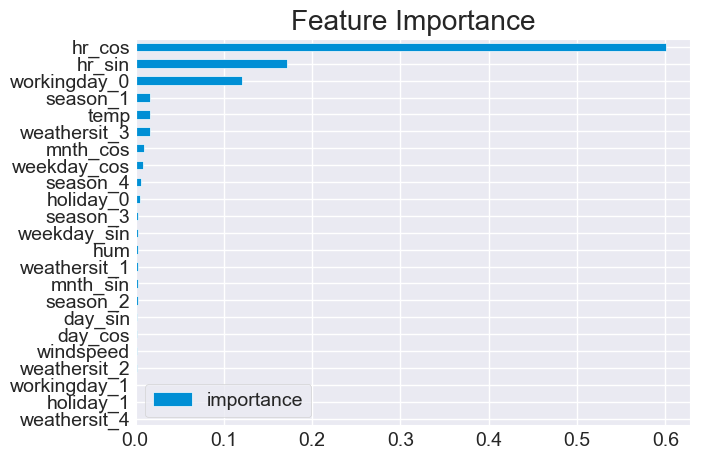

In [39]:
f1.sort_values('importance').plot(kind='barh', title='Feature Importance')

##### Forcast on Test

In [40]:
X_test1 = X_test
X_test1['prediction'] = reg.predict(X_test1)


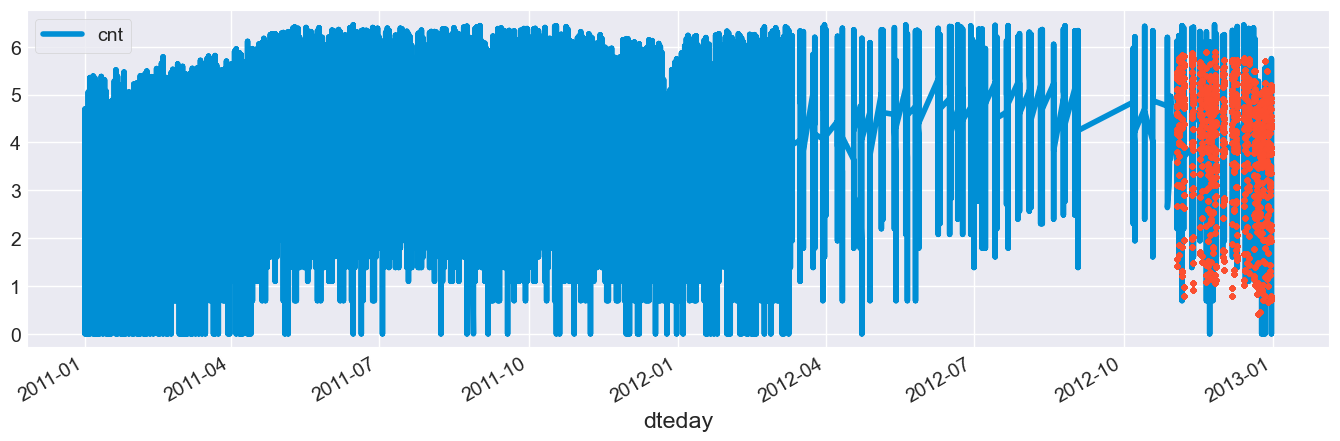

In [41]:
data1 = data.merge(X_test1[['prediction']],how='left', left_index=True, right_index=True )
ax = data1[['cnt']].plot(figsize=(15,5))
data1['prediction'].plot(ax=ax, style='.')

plt.show()

#### Time Series Prediction With Cross Validation for Future Prediction

In [42]:
from sklearn.model_selection import TimeSeriesSplit

# We have hourly data and we want to predict the future 1 month hourly demand, hence 24hour*30days
tss = TimeSeriesSplit(n_splits=5, test_size = 24*30*1, gap=24)

df = data
df['yr'] = df.index.year

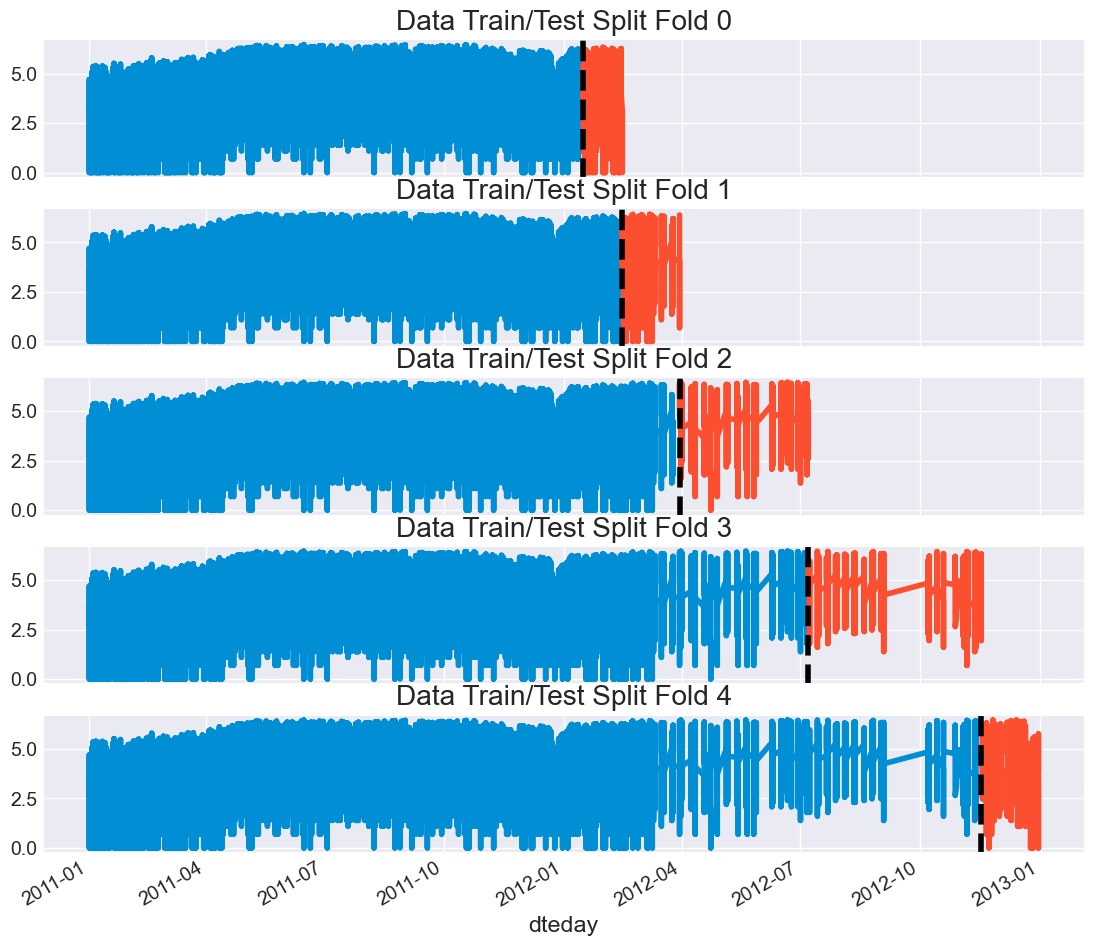

In [43]:
fig, axs = plt.subplots(5, 1, figsize=(12, 12), sharex=True)

fold = 0
for train_idx, val_idx in tss.split(df):
    train = df.iloc[train_idx]
    test = df.iloc[val_idx]
    train['cnt'].plot(ax=axs[fold],
                          label='Training Set',
                          title=f'Data Train/Test Split Fold {fold}')
    test['cnt'].plot(ax=axs[fold],
                         label='Test Set')
    axs[fold].axvline(test.index.min(), color='black', ls='--')
    fold += 1
plt.show()

In [44]:

preds = []
scores = []
for train_idx, val_idx in tss.split(df):
    train = df.iloc[train_idx]
    test = df.iloc[val_idx]
    
    # Train and test features for time series data: we use only the day, mnth, hr, and weekday columns
    feature = ['day','mnth','hr', 'weekday']
    TARGET = 'cnt'

    X_train = train[feature]
    y_train = train[TARGET]

    X_test = test[feature]
    y_test = test[TARGET]

    reg = XGBRegressor(base_score=0.25, booster='gbtree',
             colsample_bylevel=1, colsample_bytree=1, 
              gamma=0, gpu_id=-1, grow_policy='depthwise',
             learning_rate=0.05, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=10, max_leaves=0, min_child_weight=2,
             n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, eval_metric='rmse' )
             
    reg.fit(X_train, y_train,
            eval_set=[(X_train, y_train), (X_test, y_test)],
            verbose=100)

    y_pred = reg.predict(X_test)
    preds.append(y_pred)
    score = np.sqrt(mean_squared_error(y_test, y_pred))
    scores.append(score)

[0]	validation_0-rmse:4.07535	validation_1-rmse:4.08866
[99]	validation_0-rmse:0.23957	validation_1-rmse:0.98151
[0]	validation_0-rmse:4.07333	validation_1-rmse:4.27651
[99]	validation_0-rmse:0.26938	validation_1-rmse:0.90943
[0]	validation_0-rmse:4.08480	validation_1-rmse:4.62663
[99]	validation_0-rmse:0.30218	validation_1-rmse:0.62285
[0]	validation_0-rmse:4.12030	validation_1-rmse:4.63934
[99]	validation_0-rmse:0.30728	validation_1-rmse:0.59915
[0]	validation_0-rmse:4.15309	validation_1-rmse:4.04208
[99]	validation_0-rmse:0.31246	validation_1-rmse:0.64427


In [45]:
print(f'Score across folds {np.mean(scores):0.4f}')
print(f'Fold scores:{scores}')

Score across folds 0.7514
Fold scores:[0.981505020052033, 0.9094314405763014, 0.622848647903331, 0.5991459747816007, 0.64427246981685]


In [46]:
print('R2 score:', r2_score(y_test, y_pred))
print("root mean_squared_error: ", np.sqrt(mean_squared_error(y_test, y_pred)))
print("mean_absolute_error: ", mean_absolute_error(y_test, y_pred))

R2 score: 0.7988428670186556
root mean_squared_error:  0.64427246981685
mean_absolute_error:  0.5138561842213795


#### Predicting the Future

In [47]:
X_all = df[feature]
y_all = df[TARGET]

reg.fit(X_all, y_all,
        eval_set=[(X_all, y_all)],
        verbose=100)

[0]	validation_0-rmse:4.14772
[99]	validation_0-rmse:0.32258


XGBRegressor(base_score=0.25, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric='rmse', gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.05, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=10, max_leaves=0, min_child_weight=2,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [48]:
print('R2 score:', r2_score(y_test, y_pred))
print("root mean_squared_error: ", np.sqrt(mean_squared_error(y_test, y_pred)))
print("mean_absolute_error: ", mean_absolute_error(y_test, y_pred))

R2 score: 0.7988428670186556
root mean_squared_error:  0.64427246981685
mean_absolute_error:  0.5138561842213795


In [49]:
# Creating date, hour, weekday, mnth, yr, and day of a timeseries dataframe
def create_features(df):
    """
    Create time series features based on time series index.
    """
    df = df.copy()
    df['hr'] = df.index.hour
    df['weekday'] = df.index.dayofweek
    df['mnth'] = df.index.month
    df['yr'] = df.index.year
    df['day'] = df.index.day
    return df

In [50]:
start = datetime.datetime.now()
# Create future dataframe
# Take the start date the current time of the device and add two months for the end time of the prediction

future = pd.date_range(start =start,end = start + relativedelta.relativedelta(months=2), freq='1h')
future_df = pd.DataFrame(index=future)           # Making the timestamp of the comming two months as an index of the dataframe
future_df['isFuture'] = True                     # assigning True for the new dataframe which is from the future
df['isFuture'] = False                           # assigning False for the old data which is from the past
future_df =  create_features(future_df)


In [51]:
future_df.head()

,isFuture,hr,weekday,mnth,yr,day
2022-10-30 17:09:42.786187,True,17,6,10,2022,30
2022-10-30 18:09:42.786187,True,18,6,10,2022,30
2022-10-30 19:09:42.786187,True,19,6,10,2022,30
2022-10-30 20:09:42.786187,True,20,6,10,2022,30
2022-10-30 21:09:42.786187,True,21,6,10,2022,30


In [52]:
future_df['pred'] = reg.predict(future_df[feature])
future_df['pred'] = np.expm1(future_df.pred)    # Reverse Log Transformation of predicted results
future_df['pred']

2022-10-30 17:09:42.786187     41.346260
2022-10-30 18:09:42.786187     49.255211
2022-10-30 19:09:42.786187     45.511173
2022-10-30 20:09:42.786187     45.866276
2022-10-30 21:09:42.786187     59.442280
                                 ...    
2022-12-30 13:09:42.786187    142.995880
2022-12-30 14:09:42.786187    132.630768
2022-12-30 15:09:42.786187    132.572220
2022-12-30 16:09:42.786187    171.382919
2022-12-30 17:09:42.786187    245.807892
Freq: H, Name: pred, Length: 1465, dtype: float32

In [53]:
fig = px.line(future_df, x=future_df.index, y="pred", markers=True, width= 1300)
fig.show()

In [54]:
reg.save_model('BikeDemand_regression_model.json')